In [2]:
%%time
from td_toolkits_v3.opticals.tools.utils import OptLoader, OptFitting

target = 'LCT-15-1098'

test_loader = OptLoader(Experiment.objects.last().name)
rt_df = test_loader.rt
opt_df = test_loader.opt
target_rt_df = rt_df[rt_df['LC']==target]
target_opt_df = opt_df[opt_df['LC']==target]
test_fitting = OptFitting(target, target_rt_df, target_opt_df)

CPU times: user 1.47 s, sys: 797 ms, total: 2.26 s
Wall time: 756 ms


In [3]:
import matplotlib.pyplot as plt
import numpy as np

def aux_plot(x, y, model):
    plt.figure(figsize=(10,8))
    ax = plt.axes(projection='3d')
    # sample
    ax.scatter(x[:,0], x[:,1], y, label='sample')
    # predict
    x0_range = np.linspace(min(x[:,0]), max(x[:,0]), 50)
    x1_range = np.linspace(min(x[:,1]), max(x[:,1]), 50)
    x0_range, x1_range = np.meshgrid(x0_range, x1_range)
    predict_region = np.array(list(zip(x0_range.flatten(), x1_range.flatten())))
    predict = model.predict(predict_region)
    ax.scatter(x0_range, x1_range, predict, label='fitting surface', alpha=0.1)
    return ax
    

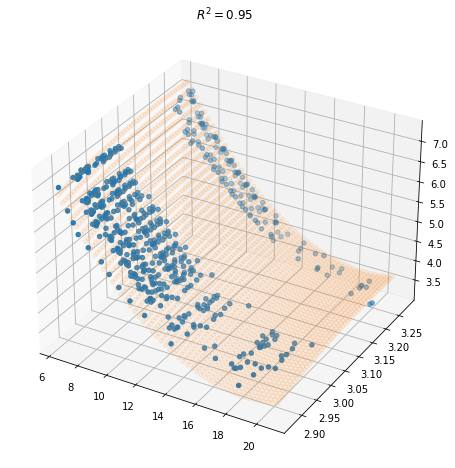

CPU times: user 845 ms, sys: 372 ms, total: 1.22 s
Wall time: 469 ms


In [3]:
%%time
# 1. f(Tr, cell gap) |-> Vop
x = test_fitting.rt_df[['Tr', 'Cell Gap']].to_numpy()
y = test_fitting.rt_df['Vop'].to_numpy()

ax = aux_plot(x, y, test_fitting.voltage_model)
ax.set_title(f"$R^2 = {test_fitting.r2['f(Tr, Cell Gap) |-> Vop']:.2f}$")
plt.show()

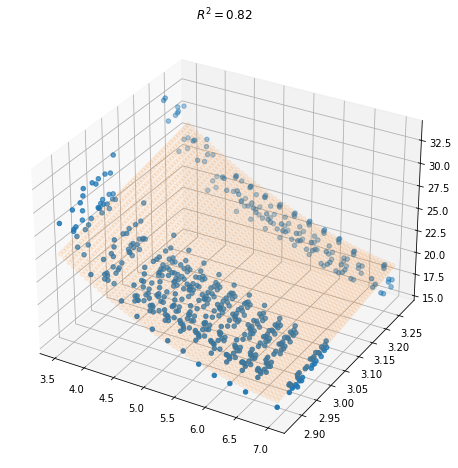

CPU times: user 1.08 s, sys: 364 ms, total: 1.44 s
Wall time: 629 ms


In [4]:
%%time
# 2. f(Vop, cell gap) |-> RT
x = test_fitting.rt_df[['Vop', 'Cell Gap']].to_numpy()
y = test_fitting.rt_df['RT'].to_numpy()

ax = aux_plot(x, y, test_fitting.response_time_model)
ax.set_title(f"$R^2 = {test_fitting.r2['f(Vop, Cell Gap) |-> RT']:.2f}$")
plt.show()

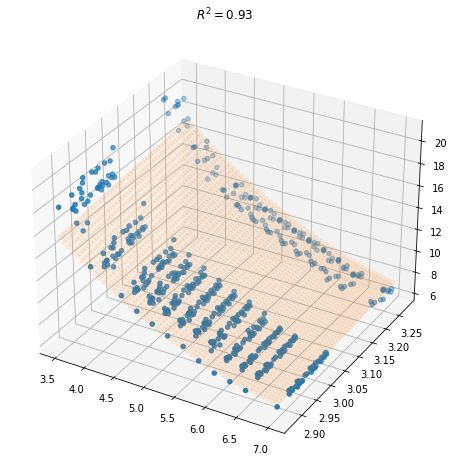

CPU times: user 1.09 s, sys: 398 ms, total: 1.49 s
Wall time: 606 ms


In [5]:
%%time
# 3. f(Vop, cell gap) |-> Tr
x = test_fitting.rt_df[['Vop', 'Cell Gap']].to_numpy()
y = test_fitting.rt_df['Tr'].to_numpy()

ax = aux_plot(x, y, test_fitting.time_rise_model)
ax.set_title(f"$R^2 = {test_fitting.r2['f(Vop, Cell Gap) |-> Tr']:.2f}$")
plt.show()

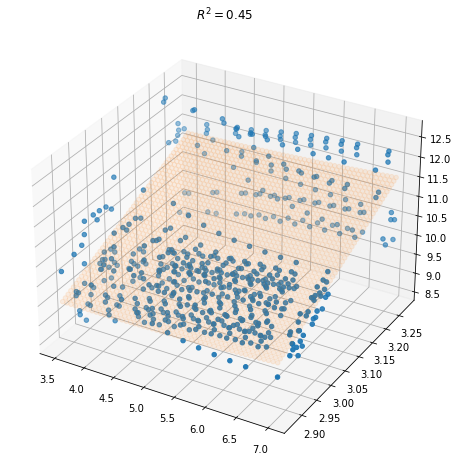

CPU times: user 1.2 s, sys: 382 ms, total: 1.58 s
Wall time: 605 ms


In [6]:
%%time
# 4. f(Vop, cell gap) |-> Tf
x = test_fitting.rt_df[['Vop', 'Cell Gap']].to_numpy()
y = test_fitting.rt_df['Tf'].to_numpy()

ax = aux_plot(x, y, test_fitting.time_fall_model)
ax.set_title(f"$R^2 = {test_fitting.r2['f(Vop, Cell Gap) |-> Tf']:.2f}$")
plt.show()

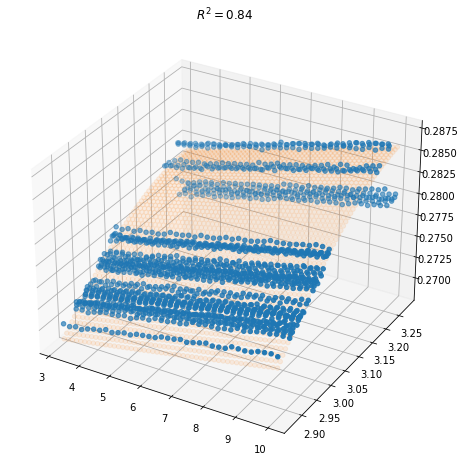

CPU times: user 1.25 s, sys: 389 ms, total: 1.64 s
Wall time: 770 ms


In [7]:
%%time
# 5. f(Vop, cell gap) |-> Wx
x = test_fitting.opt_df[['Vop', 'Cell Gap']].to_numpy()
y = test_fitting.opt_df['Wx'].to_numpy()

ax = aux_plot(x, y, test_fitting.wx_model)
ax.set_title(f"$R^2 = {test_fitting.r2['f(Vop, Cell Gap) |-> Wx']:.2f}$")
plt.show()

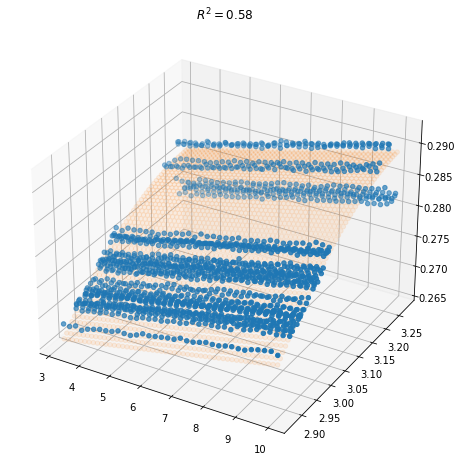

CPU times: user 578 ms, sys: 336 ms, total: 914 ms
Wall time: 247 ms


In [12]:
%%time
# 6. f(Vop, cell gap) |-> Wy
x = test_fitting.opt_df[['Vop', 'Cell Gap']].to_numpy()
y = test_fitting.opt_df['Wy'].to_numpy()

ax = aux_plot(x, y, test_fitting.wy_model)
ax.set_title(f"$R^2 = {test_fitting.r2['f(Vop, Cell Gap) |-> Wy']:.2f}$")
plt.show()

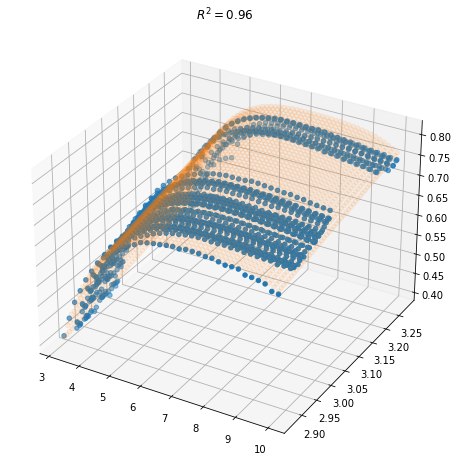

CPU times: user 1.08 s, sys: 381 ms, total: 1.46 s
Wall time: 728 ms


In [9]:
%%time
# 7. f(Vop, cell gap) |-> LC%
x = test_fitting.opt_df[['Vop', 'Cell Gap']].to_numpy()
y = test_fitting.opt_df['LC%'].to_numpy()

ax = aux_plot(x, y, test_fitting.lc_percent_model)
ax.set_title(f"$R^2 = {test_fitting.r2['f(Vop, Cell Gap) |-> LC%']:.2f}$")
plt.show()

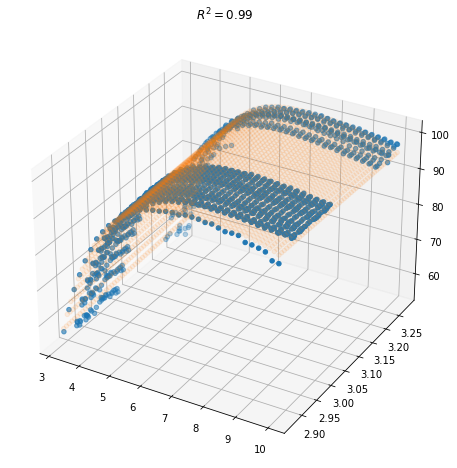

CPU times: user 1.41 s, sys: 343 ms, total: 1.75 s
Wall time: 855 ms


In [10]:
%%time
# 8. f(Vop, cell gap) |-> T%
x = test_fitting.opt_df[['Vop', 'Cell Gap']].to_numpy()
y = test_fitting.opt_df['T%'].to_numpy()

ax = aux_plot(x, y, test_fitting.transmittance_model)
ax.set_title(f"$R^2 = {test_fitting.r2['f(Vop, Cell Gap) |-> T%']:.2f}$")
plt.show()

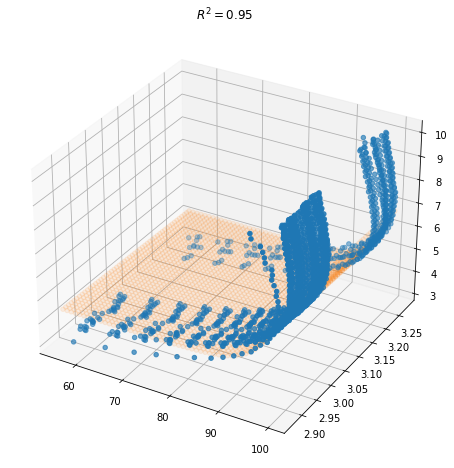

CPU times: user 540 ms, sys: 152 ms, total: 692 ms
Wall time: 417 ms


In [7]:
%%time
# 9. f(T%, cell gap) |-> Vop
x = test_fitting.opt_df[['T%', 'Cell Gap']].to_numpy()
y = test_fitting.opt_df['Vop'].to_numpy()

ax = aux_plot(x, y, test_fitting.v_percent_model)
ax.set_title(f"$R^2 = {test_fitting.r2['f(T%, Cell Gap) |-> Vop']:.2f}$")
plt.show()

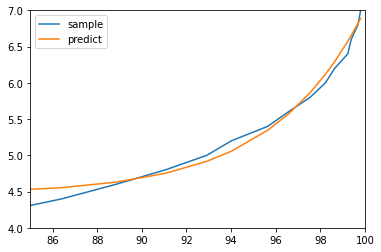

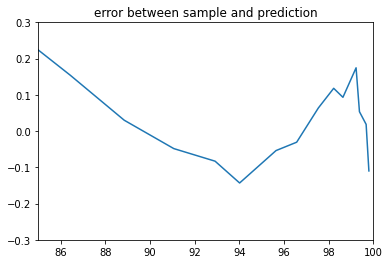

In [11]:
mask = x[:, 1]==3.002069
x_test = x[mask,:]
arg_max = x_test[:, 0].argmax()
x_test = x[:arg_max, :]
y_test = y[mask]
y_test = y[:arg_max]
plt.plot(x_test[:, 0], y_test, label='sample')
y_predict = test_fitting.v_percent(x_test)
plt.plot(x_test[:, 0], y_predict, label='predict')
plt.legend()
plt.xlim(85, 100)
plt.ylim(4, 7)
plt.show()
plt.plot(x_test[:, 0], y_predict-y_test)
plt.title('error between sample and prediction')
plt.xlim(85, 100)
plt.ylim(-0.3, 0.3)
plt.show()

In [4]:
%time test_fitting.calc()

CPU times: user 3.11 s, sys: 43.3 ms, total: 3.15 s
Wall time: 3.15 s


In [5]:
test_fitting.r2

{'f(Tr, Cell Gap) |-> Vop': 0.9625030328209006,
 'f(Vop, Cell Gap) |-> RT': 0.8467973721413503,
 'f(Vop, Cell Gap) |-> Tr': 0.9324621667343452,
 'f(Vop, Cell Gap) |-> Tf': 0.4612515913162658,
 'f(Vop, Cell Gap) |-> Wx': 0.5295715912040431,
 'f(Vop, Cell Gap) |-> Wy': 0.5776647199993573,
 'f(Vop, Cell Gap) |-> LC%': 0.9446042299940256,
 'f(Vop, Cell Gap) |-> T%': 0.995443954900514,
 'f(T%, Cell Gap) |-> Vop': 0.9532829668142462}

In [7]:
test_fitting.opt_df

,ID,LC,Point,Vop,LC%,Wx,Wy,Cell Gap,T%
16,T19BU001NB0S,LCT-15-1098,1,3.2,0.415612,0.2711,0.2691,2.933733,57.249986
17,T19BU001NB0S,LCT-15-1098,1,3.4,0.466572,0.2711,0.2700,2.933733,64.269657
18,T19BU001NB0S,LCT-15-1098,1,3.6,0.507571,0.2713,0.2697,2.933733,69.917213
19,T19BU001NB0S,LCT-15-1098,1,3.8,0.545860,0.2716,0.2705,2.933733,75.191471
20,T19BU001NB0S,LCT-15-1098,1,4.0,0.575814,0.2717,0.2701,2.933733,79.317593
...,...,...,...,...,...,...,...,...,...
2443,T19BU001NB0C,LCT-15-1098,6,9.2,0.762742,0.2802,0.2825,3.032991,98.853149
2444,T19BU001NB0C,LCT-15-1098,6,9.4,0.760797,0.2805,0.2830,3.032991,98.601072
2445,T19BU001NB0C,LCT-15-1098,6,9.6,0.758244,0.2806,0.2827,3.032991,98.270198
2446,T19BU001NB0C,LCT-15-1098,6,9.8,0.758340,0.2807,0.2833,3.032991,98.282639


In [12]:
test_loader.opt[(test_loader.opt['Vop']>3) & (test_loader.opt['LC']=='LCT-15-1098')].iloc[0,0]

'T19BU001NB0S'

In [14]:
OpticalLog.objects.last()

<OpticalLog: T19BR001NN2S, p 6 v: 10.0, (0.759113, 0.2851, 0.2891)>